In [2]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from pandas_datareader import data
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
import pyfolio as pf
%matplotlib inline

C:\Users\LAVANYA MARAN\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
import csv
df = pd.read_csv('Final_stock_data_V2.csv')
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
1,ABT,Abbott Laboratories,Healthcare,Increase,Above Fair Price,OverValued,Average,118.2900,0.181179,2.091710e+11,...,0.74,3.940,0.1318,22.924420,30.022842,51.234756,25.96,0.109154,0.249769,0.247649
2,ACN,Accenture plc,Technology,Increase,Above Fair Price,OverValued,Sustainable,323.9050,0.208836,2.047083e+11,...,1.21,9.613,0.1135,31.025385,33.694477,121.148794,9.45,0.166287,0.254874,0.245322
3,ADM,Archer-Daniels-Midland Company,Consumer Defensive,Increase,Above Fair Price,OverValued,Not Sustainable,76.9850,0.122815,4.327843e+10,...,0.81,4.790,0.0660,14.804809,16.072025,19.449588,36.42,0.117663,0.252289,0.150693
4,ADP,"Automatic Data Processing, Inc.",Industrials,Increase,Above Fair Price,OverValued,Sustainable,201.0100,0.182708,8.443324e+10,...,0.83,6.460,0.1371,26.483530,31.116098,90.801919,14.18,0.120094,0.272415,0.178939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
934,ZD,"Ziff Davis, Inc.",Communication Services,Increase,Above Fair Price,OverValued,No Data,102.4800,0.145864,4.941668e+09,...,1.01,4.120,0.1140,14.193907,24.873789,38.485339,999.00,0.141975,0.308007,0.055993
935,ZUMZ,Zumiez Inc.,Consumer Cyclical,Decrease,Above Fair Price,UnderValued,No Data,42.6600,0.035214,9.777245e+08,...,1.68,4.870,0.1500,9.233767,8.759754,21.330001,999.00,0.223419,0.513665,0.157523
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


<AxesSubplot:>

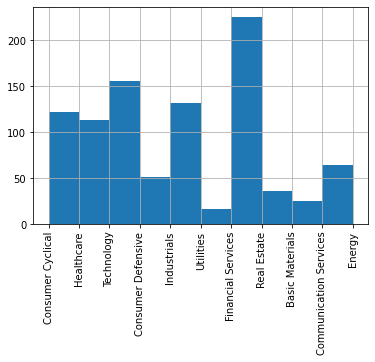

In [4]:
df['sector'].hist(xrot=90)

## Filter based on 2/3 criteria

In [5]:
def check_criteria(each):
    check = []
    if each["capm_status"] == "UnderValued":
        check.append(True)
    if each["Earnings_expectation"] == "Increase":
        check.append(True)
    if each["irv_status"] == "Below Fair Price":
        check.append(True)
    return check

In [6]:
def check_number(criteria):
    if len(criteria) >= 2:
        return True
    else:
        return False

In [7]:
rows = []
for i in range(938):
    each = df.iloc[i]
    criteria = check_criteria(each)
    result = check_number(criteria)
    if result:
        rows.append(i)

In [8]:
len(rows)

476

In [9]:
df = df.iloc[rows]
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,1.55,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,1.95,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,XOMA,XOMA Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,20.7600,-0.034853,2.348205e+08,...,0.81,0.082,0.1900,-90.260870,253.170730,14.120154,999.00,0.117663,0.689078,0.371572
932,XP,XP Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,34.1100,-0.001020,1.908622e+10,...,1.91,0.986,0.0478,27.508064,34.594322,7.380346,999.00,0.251378,NaN,NaN
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


In [10]:
#total number of stocks for each sector 

df["sector"].value_counts()

Industrials               93
Technology                89
Consumer Cyclical         79
Financial Services        68
Healthcare                52
Communication Services    29
Basic Materials           20
Consumer Defensive        19
Energy                    15
Real Estate               11
Utilities                  1
Name: sector, dtype: int64

In [18]:
#df for each sector

df_basic_materials = df.loc[df['sector'] == 'Basic Materials']
df_communication = df.loc[df['sector'] == 'Communication Services']
df_consumer_c = df.loc[df['sector'] == 'Consumer Cyclical']
df_consumer_d = df.loc[df['sector'] == 'Consumer Defensive']
df_energy = df.loc[df['sector'] == 'Energy']
df_financial = df.loc[df['sector'] == 'Financial Services']
df_healthcare = df.loc[df['sector'] == 'Healthcare']
df_industrials = df.loc[df['sector'] == 'Industrials']
df_real_estate = df.loc[df['sector'] == 'Real Estate']
df_tech = df.loc[df['sector'] == 'Technology']
df_utilities = df.loc[df['sector'] == 'Utilities']

## Selection of Sector based on Volatility & Returns

In [19]:
#calculating the average volatility for all sectors

basic_AHV = df_basic_materials['AHV_5y'].mean()
comm_AHV = df_communication['AHV_5y'].mean()
consumer_c_AHV = df_consumer_c['AHV_5y'].mean()
consumer_d_AHV = df_consumer_d['AHV_5y'].mean()
energy_AHV = df_energy['AHV_5y'].mean()
financial_AHV = df_financial['AHV_5y'].mean()
healthcare_AHV = df_healthcare['AHV_5y'].mean()
industrials_AHV = df_industrials['AHV_5y'].mean()
real_estate_AHV = df_real_estate['AHV_5y'].mean()
tech_AHV = df_tech['AHV_5y'].mean()
utilities_AHV = df_utilites['AHV_5y'].mean()

print(tabulate([['Basic Materials', basic_AHV],['Communication Services', comm_AHV],['Consumer Cyclical', consumer_c_AHV],['Consumer Defensive', consumer_d_AHV], ['Energy', energy_AHV], ['Financial Services', financial_AHV], ['Healthcare', healthcare_AHV], ['Industrials', industrials_AHV], ['Real Estate', real_estate_AHV], ['Technology', tech_AHV], ['Utilities', utilities_AHV]],
               headers=['Sector','Historical Volatility']))

Sector                    Historical Volatility
----------------------  -----------------------
Basic Materials                        0.50197
Communication Services                 0.48408
Consumer Cyclical                      0.505359
Consumer Defensive                     0.41862
Energy                                 0.523126
Financial Services                     0.410638
Healthcare                             0.525966
Industrials                            0.450725
Real Estate                            0.372704
Technology                             0.476139
Utilities                              0.260092


From above, the least volatile sectors (range from 0.2-0.4) are Utilities (0.260092), Real Estate (0.372704), Financial Services (0.410638), Consumer Defensive (0.41862), Industrials (0.450725), Technology (0.476139), Communication Services (0.48408). 

In [20]:
#calculating the average returns

basic_returns = df_basic_materials['annu_return_5y'].mean()
comm_returns = df_communication['annu_return_5y'].mean()
consumer_c_returns = df_consumer_c['annu_return_5y'].mean()
consumer_d_returns = df_consumer_d['annu_return_5y'].mean()
energy_returns = df_energy['annu_return_5y'].mean()
financial_returns = df_financial['annu_return_5y'].mean()
healthcare_returns = df_healthcare['annu_return_5y'].mean()
industrials_returns = df_industrials['annu_return_5y'].mean()
real_estate_returns = df_real_estate['annu_return_5y'].mean()
tech_returns = df_tech['annu_return_5y'].mean()
utilities_returns = df_utilites['annu_return_5y'].mean()

print(tabulate([['Basic Materials', basic_returns],['Communication Services', comm_returns],['Consumer Cyclical', consumer_c_returns],['Consumer Defensive', consumer_d_returns], ['Energy', energy_returns], ['Financial Services', financial_returns], ['Healthcare', healthcare_returns], ['Industrials', industrials_returns], ['Real Estate', real_estate_returns], ['Technology', tech_returns], ['Utilities', utilities_returns]],
               headers=['Sector','Annual Returns']))

Sector                    Annual Returns
----------------------  ----------------
Basic Materials                0.0631966
Communication Services         0.0340231
Consumer Cyclical              0.0942812
Consumer Defensive             0.049066
Energy                         0.0551988
Financial Services             0.03874
Healthcare                     0.101074
Industrials                    0.0855473
Real Estate                    0.106064
Technology                     0.123625
Utilities                      0.118782


In [21]:
#Chosen sectors for income model: utilities, real estate, industrials, technology
#returns 194 rows

In [22]:
df2 = pd.concat([df_utilities, df_real_estate, df_industrials, df_tech])

In [23]:
df2

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.0550,0.092009,2.111406e+10,...,0.61,6.179,0.0600,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782
35,BXP,"Boston Properties, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,121.0050,0.052115,1.890183e+10,...,1.16,2.044,0.0700,39.673770,59.200100,31.618901,13.57,0.160209,0.318134,0.015426
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.5300,0.182808,3.330930e+10,...,1.40,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.0200,0.198920,6.131986e+10,...,0.36,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.1600,0.204253,3.232536e+10,...,0.31,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,UEIC,Universal Electronics Inc.,Technology,Increase,Above Fair Price,UnderValued,No Data,32.0000,0.045029,4.192544e+08,...,1.18,1.707,0.1500,9.090909,18.746338,15.999999,999.00,0.162640,0.491506,-0.118525
919,VSAT,"ViaSat, Inc.",Technology,Increase,Below Fair Price,UnderValued,No Data,41.2500,-0.011116,3.029557e+09,...,1.12,0.478,0.2460,85.937500,86.297070,42.440039,999.00,0.155346,0.431753,-0.081127
923,WDAY,"Workday, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,216.5600,0.160951,5.414000e+10,...,1.35,0.117,0.1579,60.831463,1850.940200,115.161464,13.09,0.183305,0.383779,0.213788
928,WTRH,Waitr Holdings Inc.,Technology,Increase,Above Fair Price,UnderValued,No Data,0.4474,-0.264822,6.456787e+07,...,-1.29,0.043,0.2000,-5.592500,10.404651,0.328108,999.00,-0.137611,1.128303,-0.461342


## Filtering Stocks based on Sharpe Ratio

In [24]:
def get_closeprice(ticker):    
    start_date = str(date.today().year - 5) +'-0'+ str(date.today().month) +'-'+ str(date.today().day)
    end_date = str(date.today())
    
    panel_data = data.DataReader([ticker],'yahoo', start_date, end_date)
    closes = panel_data[["Close", "Adj Close"]]
    
    return closes

In [25]:
def get_sharpe_ratio(ticker):
    
    closes = get_closeprice(ticker)
    adj_close = closes["Adj Close"]
    
    risk_free_ann_ret_rate = 0.0195  #assuming this rate based on the latest data
     
    #Rp
    returns_ts = adj_close.pct_change().dropna()
    
    #Average Rp
    avg_daily_ret = returns_ts.mean()

    #Average risk-free rate for the year (Annual rate / number of trading days to spread it out)
    returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252

    #Average Rf
    avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

    #calculate sharpe ratio

    #Add the excess return columns for each ETF: Rp - Rf
    returns_ts['Excess_ret'] = returns_ts[ticker] - returns_ts['RiskFree_Rate']
    
    sharpe = ((avg_daily_ret[ticker] - avg_rf_ret) /returns_ts['Excess_ret'].std())*np.sqrt(252)

    return sharpe.round(3)

In [26]:
sharpe_list = []
for i in range(len(df2)):
    each = df2.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [27]:
sharpe_list

[0.495,
 0.159,
 0.654,
 0.605,
 0.846,
 0.35,
 0.82,
 0.397,
 0.441,
 -0.053,
 0.163,
 0.785,
 -0.022,
 0.432,
 0.765,
 0.709,
 0.366,
 0.375,
 0.501,
 0.227,
 0.284,
 0.613,
 0.309,
 0.627,
 0.747,
 0.477,
 0.693,
 -0.036,
 1.252,
 0.521,
 0.394,
 0.311,
 0.637,
 0.523,
 0.168,
 0.253,
 0.222,
 0.715,
 0.057,
 0.363,
 0.121,
 0.861,
 0.014,
 0.44,
 0.142,
 -0.275,
 0.329,
 0.235,
 0.362,
 0.233,
 0.421,
 0.635,
 0.563,
 0.329,
 0.462,
 0.251,
 0.635,
 -0.072,
 0.78,
 0.508,
 0.354,
 0.187,
 0.656,
 -0.158,
 0.452,
 0.226,
 0.626,
 0.33,
 0.858,
 0.365,
 0.437,
 0.091,
 0.588,
 -0.169,
 0.012,
 0.713,
 0.263,
 0.238,
 0.399,
 0.57,
 0.588,
 0.424,
 0.438,
 0.256,
 0.619,
 0.705,
 0.469,
 0.221,
 0.596,
 0.224,
 0.531,
 1.07,
 0.591,
 0.21,
 0.111,
 -0.102,
 0.522,
 1.016,
 0.375,
 0.189,
 0.444,
 0.627,
 0.419,
 0.282,
 0.459,
 0.611,
 0.981,
 0.777,
 0.419,
 0.814,
 0.385,
 0.178,
 0.414,
 0.609,
 0.547,
 0.514,
 0.72,
 0.478,
 0.07,
 0.201,
 0.508,
 0.662,
 1.395,
 1.065,
 0.084,
 0

In [28]:
df2["sharpe"] = sharpe_list
df2

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.0550,0.092009,2.111406e+10,...,6.179,0.0600,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.495
35,BXP,"Boston Properties, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,121.0050,0.052115,1.890183e+10,...,2.044,0.0700,39.673770,59.200100,31.618901,13.57,0.160209,0.318134,0.015426,0.159
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.5300,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.654
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.0200,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.605
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.1600,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,UEIC,Universal Electronics Inc.,Technology,Increase,Above Fair Price,UnderValued,No Data,32.0000,0.045029,4.192544e+08,...,1.707,0.1500,9.090909,18.746338,15.999999,999.00,0.162640,0.491506,-0.118525,-0.081
919,VSAT,"ViaSat, Inc.",Technology,Increase,Below Fair Price,UnderValued,No Data,41.2500,-0.011116,3.029557e+09,...,0.478,0.2460,85.937500,86.297070,42.440039,999.00,0.155346,0.431753,-0.081127,0.046
923,WDAY,"Workday, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,216.5600,0.160951,5.414000e+10,...,0.117,0.1579,60.831463,1850.940200,115.161464,13.09,0.183305,0.383779,0.213788,0.684
928,WTRH,Waitr Holdings Inc.,Technology,Increase,Above Fair Price,UnderValued,No Data,0.4474,-0.264822,6.456787e+07,...,0.043,0.2000,-5.592500,10.404651,0.328108,999.00,-0.137611,1.128303,-0.461342,0.036


In [42]:
df3 = df2[df2["sharpe"] > 0.3]
df3

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.0600,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.495
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.530,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.654
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.020,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.605
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.160,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.846
416,EXPI,"eXp World Holdings, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,25.150,0.156613,3.710555e+09,...,0.467,0.1000,36.985294,53.854390,8.428719,999.00,0.397249,NaN,NaN,0.820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,SMTC,Semtech Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,69.930,0.089745,4.506065e+09,...,1.619,0.1150,22.270700,43.193330,26.474440,999.00,0.200323,0.436216,0.154164,0.506
889,TSEM,Tower Semiconductor Ltd.,Technology,Increase,Above Fair Price,UnderValued,No Data,46.840,0.148796,5.081625e+09,...,1.189,0.1500,22.199053,39.394447,23.419999,999.00,0.177227,0.434529,0.166962,0.501
890,TTD,"The Trade Desk, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,73.680,0.376786,3.793717e+10,...,0.561,0.2800,80.967030,131.336900,96.589249,999.00,0.302433,0.683392,0.956083,1.129
901,UCTT,"Ultra Clean Holdings, Inc.",Technology,Increase,Above Fair Price,UnderValued,No Data,45.850,0.183616,2.058665e+09,...,2.230,0.2000,9.713984,20.560537,33.624820,999.00,0.261103,0.610451,0.290763,0.613


## Correlation between Stocks

In [30]:
def get_return_series(ticker):
    closes = get_closeprice(ticker)
    return_series_close = (closes['Close'].pct_change()+ 1).cumprod() - 1
    return return_series_close

In [31]:
returns_list = []
for i in range(len(df3)):
    each = df3.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [32]:
returns_list

[Symbols          ETR
 Date                
 2017-03-20       NaN
 2017-03-21  0.007447
 2017-03-22  0.017553
 2017-03-23  0.019016
 2017-03-24  0.021410
 ...              ...
 2022-03-14  0.466356
 2022-03-15  0.479388
 2022-03-16  0.469681
 2022-03-17  0.467952
 2022-03-18  0.455452
 
 [1260 rows x 1 columns],
 Symbols         CBRE
 Date                
 2017-03-20       NaN
 2017-03-21 -0.010970
 2017-03-22 -0.018847
 2017-03-23 -0.016878
 2017-03-24 -0.032911
 ...              ...
 2022-03-14  1.458509
 2022-03-15  1.463291
 2022-03-16  1.558931
 2022-03-17  1.561182
 2022-03-18  1.562307
 
 [1260 rows x 1 columns],
 Symbols         EQIX
 Date                
 2017-03-20       NaN
 2017-03-21 -0.000417
 2017-03-22  0.010168
 2017-03-23  0.011680
 2017-03-24  0.011784
 ...              ...
 2022-03-14  0.782204
 2022-03-15  0.829236
 2022-03-16  0.835545
 2022-03-17  0.876737
 2022-03-18  0.909065
 
 [1260 rows x 1 columns],
 Symbols         SBAC
 Date                
 2017-03-20   

In [33]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,ETR,CBRE,EQIX,SBAC,CTRE,GOOD,LAMR,ALLE,AME,CAT,...,PRGS,RDWR,RIOT,RMBS,SMCI,SMTC,TSEM,TTD,UCTT,WDAY
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-21,0.007447,-0.010970,-0.000417,0.000171,-0.004450,-0.004576,-0.010589,-0.012761,-0.016787,-0.031132,...,-0.024561,-0.007467,-0.033233,-0.027211,-0.035156,-0.027616,-0.026147,-0.014436,-0.054293,-0.043041
2017-03-22,0.017553,-0.018847,0.010168,-0.001538,0.008900,-0.005084,-0.019112,-0.006115,-0.015680,-0.031132,...,-0.021754,-0.003111,0.054381,-0.035525,-0.007813,-0.020349,-0.015859,0.014173,-0.049242,-0.047368
2017-03-23,0.019016,-0.016878,0.011680,0.009141,0.007629,0.006101,-0.009685,-0.004918,-0.013835,-0.033228,...,-0.012281,-0.000622,0.006042,-0.030990,-0.001953,-0.015988,-0.018003,-0.028346,-0.029040,-0.047134
2017-03-24,0.021410,-0.032911,0.011784,0.010507,0.015893,0.010676,-0.023890,-0.002393,-0.014573,-0.034067,...,-0.016491,0.004978,0.018127,-0.021920,-0.003906,-0.001454,-0.012002,-0.054593,-0.011364,-0.029825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-14,0.466356,1.458509,0.782204,1.739621,0.116338,0.074225,0.393208,0.488103,1.344401,1.258281,...,0.515790,0.852520,3.277946,0.948602,0.582812,0.771802,1.020574,12.774278,1.392677,1.583743
2022-03-15,0.479388,1.463291,0.829236,1.752776,0.144946,0.092527,0.418001,0.521600,1.386645,1.268973,...,0.540702,0.918482,3.504532,1.106576,0.633594,0.838372,1.024003,13.139108,1.471591,1.589708
2022-03-16,0.469681,1.558931,0.835545,1.783701,0.152575,0.095069,0.445119,0.547787,1.423538,1.264990,...,0.562807,0.958307,3.951662,1.192744,0.669922,0.937791,1.039863,14.829397,1.702652,1.660468


<AxesSubplot:xlabel='Date'>

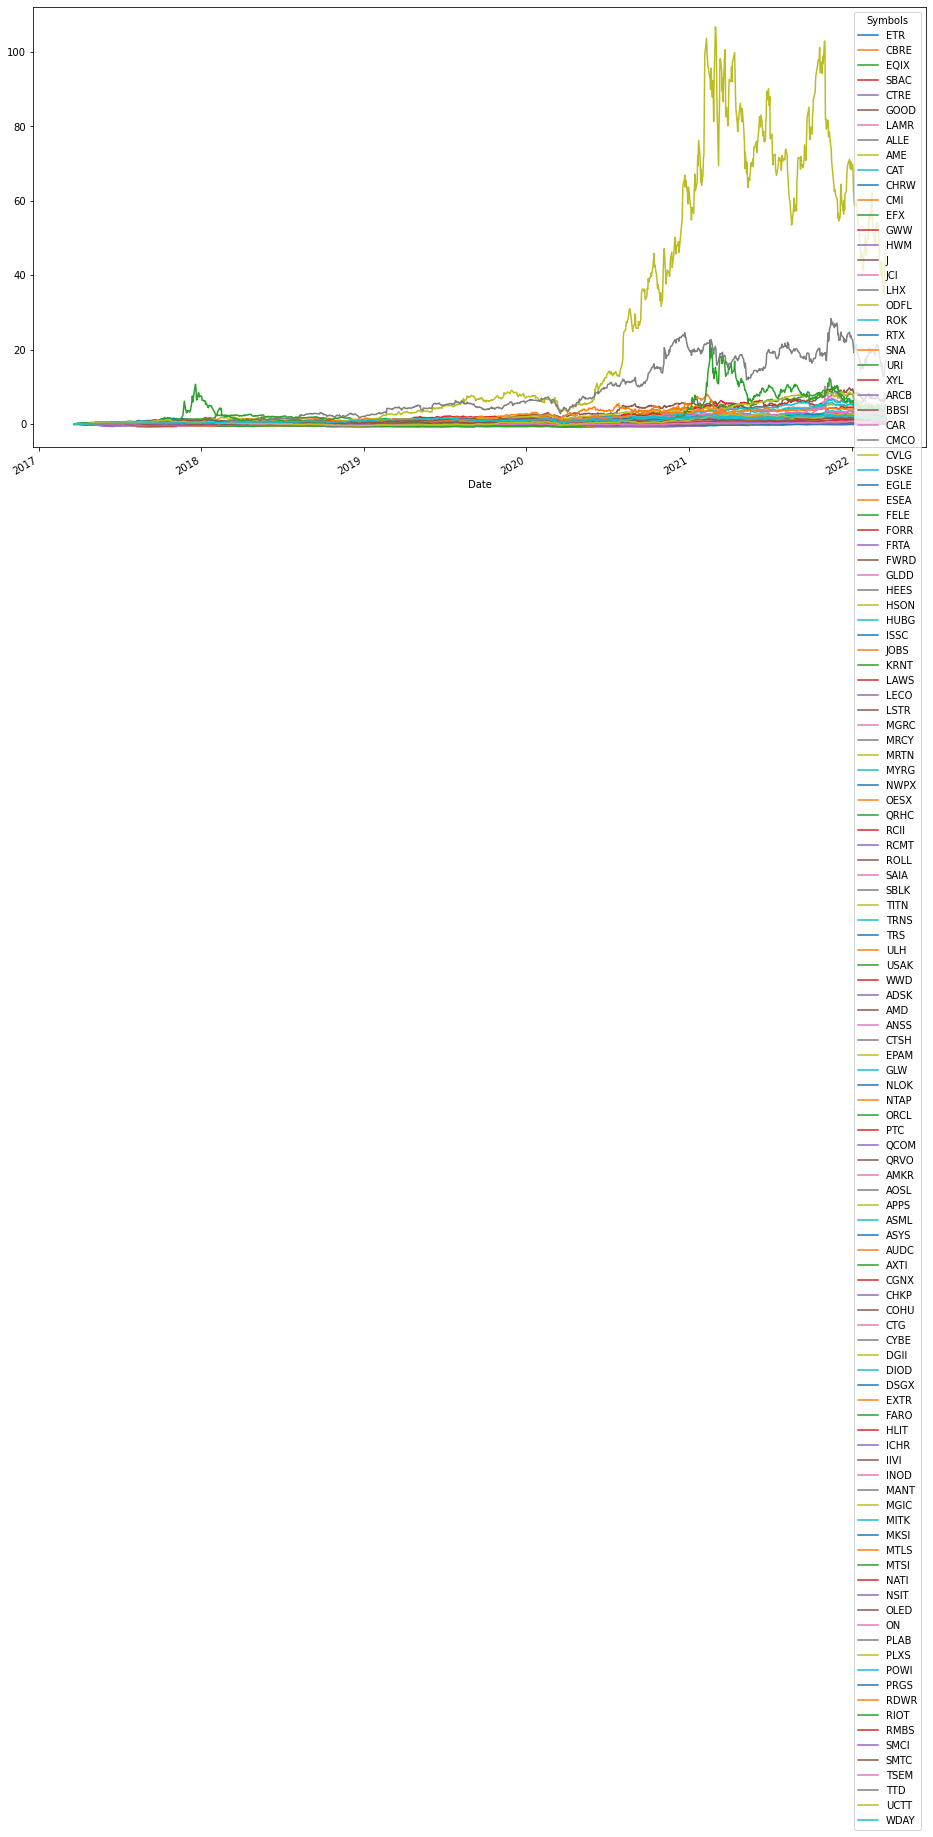

In [34]:
return_series_close.plot(figsize=(16,9))

In [35]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [36]:
highest.dropna(axis=1, how="all")

Symbols,CAR,SAIA,TRNS,AMD,APPS,TTD
Date,,,,,,
2017-03-20,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-21,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-22,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-23,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-24,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-03-14,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-15,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-16,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

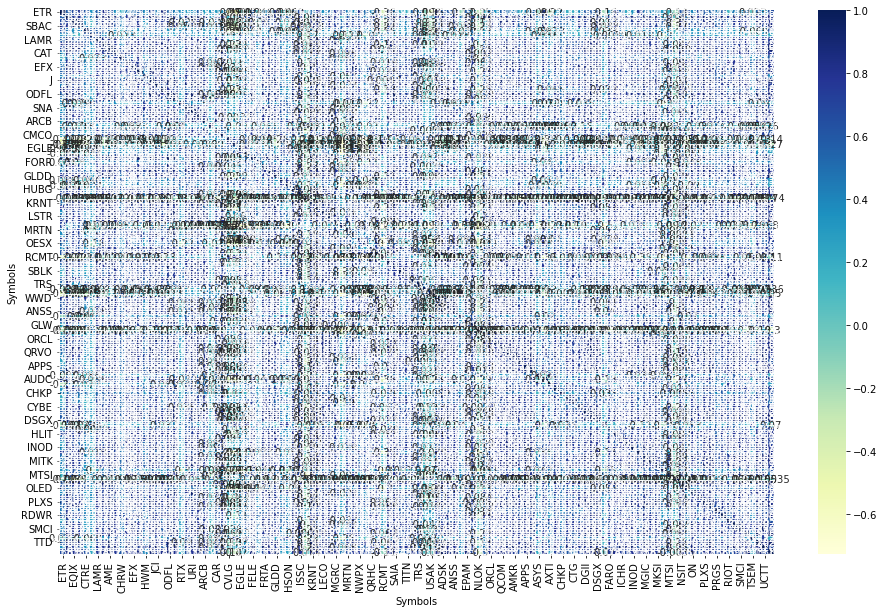

In [37]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [38]:
correlation = correlation[correlation < 0.4]
correlation

Symbols,ETR,CBRE,EQIX,SBAC,CTRE,GOOD,LAMR,ALLE,AME,CAT,...,PRGS,RDWR,RIOT,RMBS,SMCI,SMTC,TSEM,TTD,UCTT,WDAY
Symbols,,,,,,,,,,,,,,,,,,,,,
ETR,NaN,NaN,NaN,NaN,NaN,0.331120,NaN,NaN,NaN,0.365573,...,NaN,NaN,0.127225,NaN,NaN,NaN,0.022971,NaN,0.353498,NaN
CBRE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EQIX,NaN,NaN,NaN,NaN,0.371188,0.105612,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.329267,NaN,NaN,NaN
SBAC,NaN,NaN,NaN,NaN,NaN,0.099108,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.249262,NaN,NaN,NaN
CTRE,NaN,NaN,0.371188,NaN,NaN,NaN,NaN,NaN,NaN,0.369025,...,0.394203,NaN,0.320930,0.289001,0.314235,NaN,-0.069429,NaN,0.342459,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SMTC,NaN,NaN,NaN,NaN,NaN,0.238967,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.391969,NaN,NaN,NaN
TSEM,0.022971,NaN,0.329267,0.249262,-0.069429,0.371044,NaN,0.308248,NaN,NaN,...,NaN,0.340965,NaN,NaN,NaN,0.391969,NaN,NaN,NaN,0.230744
TTD,NaN,NaN,NaN,NaN,NaN,0.146702,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Final DF

In [39]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [40]:
indexes = []
for i in range(len(df3)):
    each = df3.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [41]:
chosen_df = df3.iloc[indexes]
chosen_df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.0600,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.495
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.530,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.654
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.020,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.605
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.160,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.846
365,CTRE,"CareTrust REIT, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,17.580,0.133822,1.705837e+09,...,0.777,0.1020,17.580000,22.625483,5.988839,999.00,0.154131,0.425892,0.077533,0.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,SMTC,Semtech Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,69.930,0.089745,4.506065e+09,...,1.619,0.1150,22.270700,43.193330,26.474440,999.00,0.200323,0.436216,0.154164,0.506
889,TSEM,Tower Semiconductor Ltd.,Technology,Increase,Above Fair Price,UnderValued,No Data,46.840,0.148796,5.081625e+09,...,1.189,0.1500,22.199053,39.394447,23.419999,999.00,0.177227,0.434529,0.166962,0.501
890,TTD,"The Trade Desk, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,73.680,0.376786,3.793717e+10,...,0.561,0.2800,80.967030,131.336900,96.589249,999.00,0.302433,0.683392,0.956083,1.129
901,UCTT,"Ultra Clean Holdings, Inc.",Technology,Increase,Above Fair Price,UnderValued,No Data,45.850,0.183616,2.058665e+09,...,2.230,0.2000,9.713984,20.560537,33.624820,999.00,0.261103,0.610451,0.290763,0.613


In [1]:
#chosen_df.to_csv("selected_stocks_income.csv")

## Bonds

In [44]:
pip install Nasdaq-Data-Link

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install quandl

In [46]:
import nasdaqdatalink
import quandl

In [47]:
quandl.get('USTREASURY/YIELD')['5 YR']
#expected return from US 5y treasury bond is 1.78

Date
1990-01-02    7.87
1990-01-03    7.92
1990-01-04    7.91
1990-01-05    7.92
1990-01-08    7.92
              ... 
2022-01-31    1.62
2022-02-01    1.63
2022-02-02    1.60
2022-02-03    1.66
2022-02-04    1.78
Name: 5 YR, Length: 8032, dtype: float64

## Minimization Function

In [48]:
chosen_df = pd.read_csv('selected_stocks_income.csv')
adjClose_5y = pd.read_csv('Cleaned_AdjCloseP_5y.csv', index_col='Date')

In [49]:
def calculate_returns(weights, log_returns):
    # Annual log Returns
    
    return np.sum(log_returns.mean()*weights) * 252

In [50]:
n = len(adjClose_5y[chosen_df['ticker']].columns)
log_returns_test = np.log(adjClose_5y[chosen_df['ticker']] / adjClose_5y[chosen_df['ticker']].shift(1)).dropna() # Same as 1 + stocks_data.pct_change()
log_returns_test

,ETR,CBRE,EQIX,SBAC,CTRE,GOOD,LAMR,ALLE,AME,CAT,...,PRGS,RDWR,RIOT,RMBS,SMCI,SMTC,TSEM,TTD,UCTT,WDAY
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-06,-0.002091,-0.015038,-0.008219,-0.012280,-0.007258,-0.004583,-0.001066,0.000149,0.002908,-0.004405,...,0.002863,-0.001361,0.031449,-0.011094,-0.005831,-0.017622,0.007350,-0.004158,-0.020441,0.011427
2017-02-07,-0.001697,-0.002259,-0.002702,0.003728,0.018373,-0.001532,0.007703,-0.004764,0.000387,0.004726,...,-0.002147,0.000000,0.051293,0.001592,0.017392,0.013245,-0.002750,-0.008718,0.011844,0.007934
2017-02-08,0.010135,-0.005508,0.008711,0.019561,0.003894,-0.003073,0.003698,0.008617,0.012881,-0.004296,...,0.008914,0.053063,-0.065323,-0.013617,0.005731,-0.026668,-0.011539,-0.007383,-0.003145,-0.002910
2017-02-09,-0.005618,0.025342,0.004754,0.007180,-0.007802,0.008681,-0.002112,0.059301,0.014790,0.011238,...,0.015499,0.000646,0.065323,0.019961,0.007590,-0.001503,0.022947,0.024400,0.001574,0.002328
2017-02-10,0.008834,0.074153,0.001684,-0.006245,0.005208,0.017137,0.009466,0.002645,0.007314,0.024703,...,0.006966,0.003223,-0.005900,0.011006,0.005655,0.010471,0.001360,0.000344,-0.001574,-0.005597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-17,0.009478,-0.018367,0.026415,-0.026176,-0.072449,-0.008234,-0.019979,-0.005656,-0.026758,-0.044688,...,-0.013470,-0.022104,-0.098070,-0.027448,-0.023153,-0.034224,-0.007858,-0.018713,-0.036807,-0.052144
2022-02-18,-0.003149,-0.001103,0.001921,-0.017587,-0.007208,-0.013876,0.002789,-0.004022,-0.000780,-0.014430,...,-0.022483,-0.019669,-0.045502,-0.021092,0.007948,-0.007847,0.000852,-0.017275,-0.022629,-0.010390
2022-02-22,-0.001052,-0.005230,-0.017719,0.021297,-0.021942,-0.017858,-0.013203,-0.005447,-0.006102,-0.003863,...,-0.008678,0.004873,-0.061988,-0.016972,0.000511,-0.010945,-0.006626,-0.042532,-0.036963,0.016738


In [51]:
def calculate_vol(weights):
    annualized_cov = np.dot(log_returns_test.cov()*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)
    
def calculate_returns(weights, log_returns):
    # Annual log Returns

    return np.sum(log_returns.mean()*weights) * 252

In [52]:
def function_to_minimize(weights):

    # minimize a -1 * SR (that's how the math works here, but it is the same as maximizing SR)
    return -1 * ((calculate_returns(weights, log_returns_test) - 0 )/calculate_volatility(weights, log_returns_test)) # assuming rf =0

In [53]:
required_return = 0.70 

constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1},
               {'type':'eq','fun': lambda weights: calculate_returns(weights,log_returns_test) - required_return})
bounds = tuple((0,1) for n in range(n))
equal_weights = n * [1/n] #going to be our starting point then the function will look at either direction for minimum negative SG

In [54]:
result = minimize(fun=calculate_vol,x0=equal_weights,bounds=bounds,constraints=constraints)
result

     fun: 0.5189790180108825
     jac: array([0.06871071, 0.13014228, 0.09390435, 0.07871977, 0.15702578,
       0.13542759, 0.15756058, 0.09352672, 0.10637911, 0.09029485,
       0.06216995, 0.07725317, 0.1013415 , 0.08648537, 0.15911465,
       0.08639292, 0.09820531, 0.07474203, 0.10817304, 0.12005375,
       0.10987263, 0.09111083, 0.17501464, 0.11219706, 0.1309166 ,
       0.13762759, 0.24135334, 0.14417599, 0.12136415, 0.18574309,
       0.18999939, 0.11510854, 0.10491831, 0.14397499, 0.22279298,
       0.10943497, 0.12334906, 0.17130401, 0.07407353, 0.09098021,
       0.09616611, 0.0641048 , 0.19603366, 0.13239297, 0.09322464,
       0.08393339, 0.11901986, 0.14958627, 0.07939462, 0.17145875,
       0.13105465, 0.2070306 , 0.08738766, 0.12828491, 0.1321642 ,
       0.16443688, 0.13610885, 0.1421387 , 0.13447958, 0.15529988,
       0.09343617, 0.10276193, 0.17259552, 0.1418823 , 0.19377483,
       0.23692288, 0.16543392, 0.12154567, 0.20015572, 0.12889816,
       0.0735663 , 0.11

In [55]:
min_var_weights = result['x']
min_var_weights

array([4.80286586e-17, 1.73473399e-16, 2.37951989e-16, 0.00000000e+00,
       0.00000000e+00, 2.25738571e-17, 1.19253785e-16, 0.00000000e+00,
       2.43449200e-16, 0.00000000e+00, 0.00000000e+00, 1.72475066e-16,
       0.00000000e+00, 1.21285618e-16, 5.26838687e-17, 5.14205017e-16,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.62820975e-18,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.15110002e-16,
       1.98729297e-16, 7.38708705e-16, 1.18990082e-16, 6.14606344e-17,
       7.46776205e-16, 0.00000000e+00, 0.00000000e+00, 2.12975166e-16,
       1.96897963e-16, 1.11392356e-16, 3.30950888e-17, 2.78289062e-16,
       0.00000000e+00, 9.50560686e-17, 2.16647858e-16, 3.70863399e-16,
       2.61785773e-16, 9.60075738e-17, 0.00000000e+00, 2.35631439e-16,
       0.00000000e+00, 0.00000000e+00, 1.99026967e-16, 0.00000000e+00,
       6.39052935e-17, 5.28463769e-17, 3.72068928e-16, 0.00000000e+00,
       0.00000000e+00, 7.50165473e-17, 0.00000000e+00, 0.00000000e+00,
      

In [56]:
result['x']
portfolio = {}
p = 0
for i in result['x']:
    print('Put',(i*100).round(3), "% in", log_returns_test.columns[p])

    portfolio[log_returns_test.columns[p]] = (i).round(5)
    p += 1

Put 0.0 % in ETR
Put 0.0 % in CBRE
Put 0.0 % in EQIX
Put 0.0 % in SBAC
Put 0.0 % in CTRE
Put 0.0 % in GOOD
Put 0.0 % in LAMR
Put 0.0 % in ALLE
Put 0.0 % in AME
Put 0.0 % in CAT
Put 0.0 % in CHRW
Put 0.0 % in CMI
Put 0.0 % in EFX
Put 0.0 % in GWW
Put 0.0 % in HWM
Put 0.0 % in J
Put 0.0 % in JCI
Put 0.0 % in LHX
Put 0.0 % in ODFL
Put 0.0 % in ROK
Put 0.0 % in RTX
Put 0.0 % in SNA
Put 0.0 % in URI
Put 0.0 % in XYL
Put 0.0 % in ARCB
Put 0.0 % in BBSI
Put 0.0 % in CAR
Put 0.0 % in CMCO
Put 0.0 % in CVLG
Put 0.0 % in DSKE
Put 0.0 % in EGLE
Put 0.0 % in ESEA
Put 0.0 % in FELE
Put 0.0 % in FORR
Put 0.0 % in FRTA
Put 0.0 % in FWRD
Put 0.0 % in GLDD
Put 0.0 % in HEES
Put 0.0 % in HSON
Put 0.0 % in HUBG
Put 0.0 % in ISSC
Put 0.0 % in JOBS
Put 0.0 % in KRNT
Put 0.0 % in LAWS
Put 0.0 % in LECO
Put 0.0 % in LSTR
Put 0.0 % in MGRC
Put 0.0 % in MRCY
Put 0.0 % in MRTN
Put 0.0 % in MYRG
Put 0.0 % in NWPX
Put 0.0 % in OESX
Put 0.0 % in QRHC
Put 0.0 % in RCII
Put 0.0 % in RCMT
Put 0.0 % in ROLL
Put 0.0 % 

In [57]:
cleaned_portfolio = {}
for n in portfolio:
    if portfolio[n] != 0:
        cleaned_portfolio[n] = portfolio[n]
cleaned_portfolio

{'TRNS': 0.17804, 'AMD': 0.01972, 'APPS': 0.53832, 'TTD': 0.26392}

In [58]:
list(cleaned_portfolio.keys())

['TRNS', 'AMD', 'APPS', 'TTD']

In [59]:
cleaned_pf_data = chosen_df[chosen_df['ticker'].isin(list(cleaned_portfolio.keys()))]
cleaned_pf_data

,Unnamed: 0,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
59,885,TRNS,"Transcat, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,74.73,0.203120,...,1.529,0.2500,38.127552,48.875084,79.136085,999.0,0.109154,0.423816,0.457382,1.016
65,14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.11,0.319034,...,3.242,0.3532,35.062874,36.122765,253.245268,999.0,0.256240,0.564107,0.569607,0.981
78,244,APPS,"Digital Turbine, Inc.",Technology,Increase,Below Fair Price,UnderValued,No Data,43.80,0.278657,...,0.530,0.5000,20.372091,82.641510,239.323247,999.0,0.285415,0.719036,1.325025,1.395
117,890,TTD,"The Trade Desk, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,73.68,0.376786,...,0.561,0.2800,80.967030,131.336900,96.589249,999.0,0.302433,0.683392,0.956083,1.129
